# Exploring Shakespearean plays using a visual analytics approach

## Abstract

## Introduction

The legacy that William Shakespeare has left on literature and theatre has and still is influencing generations to inspire modern writers. Shakespeare is important to this day due to his work on timeless themes such as life and death, and love and hate that remain relevant through times. Shakespeare created characters that are multi-dimensional and have distinct motives. The interplay between these characters plays an important role in progressing plots and themes in his work. In this report, we will visually analyse two of William Shakespeare’s works such as Romeo and Juliet, and Macbeth. The aim of this notebook is to answer the following questions through analysis:

•	Using network analysis, how are the relationships between characters represented and if we can define the main characters in Romeo and Juliet

•	How does the sentiment of both plays evolve throughout the play?

•	How does the language of Romeo and Juliet differ from Macbeth?

•	Through sentiment analysis, is it possible to identify key scenes and topics within Romeo and Juliet?

The data (i.e. plays) is suitable to answer our research questions as this includes characters' dialogues and the exact order of moments in the play. The dialogues and interactions between characters in plays are very precise and expressed in a short time frame. Answering these research questions would help aspiring screenplay writers, theatre practitioners and students. Applying the results found, we can determine the characteristics of what defines impactful dialogue, relationships between characters, and the thematic elements that resonate with audiences.


importing libraries 

In [271]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib
from gensim.parsing.preprocessing import remove_stopwords
from wordcloud import WordCloud 
from nltk.tokenize import word_tokenize
from nltk import pos_tag, word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
import matplotlib.pyplot as plt
from nltk import pos_tag, word_tokenize
from collections import Counter
import pprint
from textblob import TextBlob
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import nltk
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import download
from nltk.tokenize import sent_tokenize
#!pip install --upgrade networkx

Loading datasets

In [272]:
with open(r'/Users/usraaziz/Desktop/Romeo_and_Juliet.txt', 'r', encoding='utf-8') as file:
    romeo_and_juliet_raw = file.read()

with open(r'/Users/usraaziz/Desktop/Macbeth.txt', 'r', encoding='utf-8') as file:
    macbeth_raw = file.read()

## Data pre-processing 

In [275]:
# Tokenization
romeo_and_juliet_t  = word_tokenize(romeo_and_juliet_raw)
print(type(romeo_and_juliet_raw),type(romeo_and_juliet_t))
print(len(romeo_and_juliet_raw),len(romeo_and_juliet_t))

macbeth_t = word_tokenize(macbeth_raw)
print(type(macbeth_raw),type(macbeth_t))
print(len(macbeth_raw),len(macbeth_t))


<class 'str'> <class 'list'>
161721 37461
<class 'str'> <class 'list'>
123794 27886


In [276]:
romeo_and_juliet_sentences = sent_tokenize(romeo_and_juliet_raw)
len(romeo_and_juliet_sentences)
romeo_and_juliet_sentences[1001]
print(len(word_tokenize(romeo_and_juliet_sentences[1001])))

macbeth_sentences = sent_tokenize(macbeth_raw)
len(macbeth_sentences)
macbeth_sentences[1001]
print(len(word_tokenize(macbeth_sentences[1001])))

12
5


In [277]:
# Sentence lengths for both plays
sentenceLength1=0;
for currSentence1 in romeo_and_juliet_sentences: 
    sentenceLength1 = sentenceLength1 + len(word_tokenize(currSentence1))
    
sentenceRomeoAndJuliet = sentenceLength1/len(romeo_and_juliet_sentences)
print(sentenceRomeoAndJuliet)

sentenceLength2=0;
for currSentence2 in macbeth_sentences: 
    sentenceLength2 = sentenceLength2 + len(word_tokenize(currSentence2))
    
sentenceMacbeth = sentenceLength2/len(romeo_and_juliet_sentences)
print(sentenceMacbeth)

11.832280480101074
8.807959570435882


In [278]:
stop_words   = (stopwords.words('english'))
len(stop_words)
print(stop_words[1:10])

extra_words=['A','All','and','And','But','come','could','day','even','He',
             'he','it','It','If','I','In','like','man','made','men','must',
             'Man','One','one','She','see','she','said','say','Say','sort',
             'still','the','That','To','They','This','The','Then','There',
             'would','two','What','You','-','_','—','***','Gutenberg','project gutenberg™',
             'my', 'which', 'new', 'ebooks', 'website', 'includes', 'information',
             'make', 'donations']
print(extra_words[1:10])

['me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]
['All', 'and', 'And', 'But', 'come', 'could', 'day', 'even', 'He']


In [279]:
# remove stop words from romeo and juliet using tokenization
filtered_romeo_and_juliet = [w for w in romeo_and_juliet_t if not w in stop_words]
filtered_romeo_and_juliet2 = [w for w in filtered_romeo_and_juliet if not w in extra_words]

#remove punctuation from list
punctuations = '''!()-,[]{};:’“”'"\,,<>./?@#$%^&*_~'''
filtered_romeo_and_juliet3 = [w for w in filtered_romeo_and_juliet2 if not w in punctuations]

text_start1=filtered_romeo_and_juliet3.index('_Exit._')
filtered_romeo_and_juliet4 =filtered_romeo_and_juliet3[text_start1:]

# create a new variable called filtered_romeo_and_juliet5 to remove the end of the ebook
filtered_romeo_and_juliet5 = filtered_romeo_and_juliet4[:filtered_romeo_and_juliet4.index('previous')]

# Exporting romeo and juliet into a txt file
file_path_romeo_and_juliet3 = r'/Users/usraaziz/Desktop/filtered_romeo_and_juliet5.txt'

# Writing the list to a text file
with open(file_path_romeo_and_juliet3, 'w') as file:
    for item in filtered_romeo_and_juliet5:
        file.write(f"{item}\n")
len(filtered_romeo_and_juliet5)

14529

Using tokenization we can see the the length of the filtered_romeo_and_juliet5 is 14293 which excludes stop words, extra words and removes the beginning and end of the ebook. 

In [280]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

# Tokenization and Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()
romeo_and_juliet_t2 = word_tokenize(romeo_and_juliet_raw)
romeo_and_juliet_lemmatized = [wordnet_lemmatizer.lemmatize(word) for word in romeo_and_juliet_t2]

# Remove stop words
stop_words2 = set(stopwords.words('english'))
extra_words2 = set(['A','All','and','And','But','come','could','day','even','He',
             'he','it','It','If','I','In','like','man','made','men','must',
             'Man','One','one','She','see','she','said','say','Say','sort',
             'still','the','That','To','They','This','The','Then','There',
             'would','two','What','You','-','_','—','***','Gutenberg','project gutenberg™',
             'my', 'which', 'new', 'ebooks', 'website', 'includes', 'information',
             'make', 'donations'])  
filtered_romeo_and_juliet12 = [w for w in romeo_and_juliet_lemmatized if not w in stop_words2]
filtered_romeo_and_juliet22 = [w for w in filtered_romeo_and_juliet if not w in extra_words2]

# Remove punctuation
punctuations = string.punctuation
filtered_romeo_and_juliet32 = [w for w in filtered_romeo_and_juliet22 if not w in punctuations]

# Find the index of '_Exit._'
text_start12 = filtered_romeo_and_juliet3.index('_Exit._')
filtered_romeo_and_juliet42 = filtered_romeo_and_juliet32[text_start12:]

# Create a new variable called filtered_romeo_and_juliet5 to remove the end of the ebook
filtered_romeo_and_juliet52 = filtered_romeo_and_juliet4[:filtered_romeo_and_juliet42.index('previous')]

# Exporting romeo and juliet into a txt file
file_path_romeo_and_juliet2 = r'/Users/usraaziz/Desktop/filtered_romeo_and_juliet52.txt'

# Writing the list to a text file
with open(file_path_romeo_and_juliet2, 'w') as file:
    for item in filtered_romeo_and_juliet52:
        file.write(f"{item}\n")
len(filtered_romeo_and_juliet52)

15398

Using tokenization and lemmatization we can see the the length of the filtered_romeo_and_juliet52 is 15398 which excludes stop words, extra words and removes the beginning and end of the ebook. This is alot more than using tokenization while also including words that provide context. 

In [281]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

# Tokenization and Stemming
porter_stemmer = PorterStemmer()
romeo_and_juliet_t3 = word_tokenize(romeo_and_juliet_raw)
romeo_and_juliet_stemmed = [porter_stemmer.stem(word) for word in romeo_and_juliet_t3]

# Remove stop words
stop_words3 = set(stopwords.words('english'))
extra_words3 = set(['A','All','and','And','But','come','could','day','even','He',
             'he','it','It','If','I','In','like','man','made','men','must',
             'Man','One','one','She','see','she','said','say','Say','sort',
             'still','the','That','To','They','This','The','Then','There',
             'would','two','What','You','-','_','—','***','Gutenberg','project gutenberg™',
             'my', 'which', 'new', 'ebooks', 'website', 'includes', 'information',
             'make', 'donations'])
filtered_romeo_and_juliet3 = [w for w in romeo_and_juliet_stemmed if not w in stop_words]
filtered_romeo_and_juliet23 = [w for w in filtered_romeo_and_juliet3 if not w in extra_words]

# Remove punctuation
punctuations = string.punctuation
filtered_romeo_and_juliet33 = [w for w in filtered_romeo_and_juliet23 if not w in punctuations]

# Find the index of '_Exit._'
text_start13 = filtered_romeo_and_juliet33.index('_exit._')
filtered_romeo_and_juliet43 = filtered_romeo_and_juliet33[text_start13:]

# Create a new variable called filtered_romeo_and_juliet5 to remove the end of the ebook
filtered_romeo_and_juliet53 = filtered_romeo_and_juliet43[:filtered_romeo_and_juliet43.index('previou')]

# Exporting romeo and juliet into a txt file
file_path_romeo_and_juliet3 = r'/Users/usraaziz/Desktop/filtered_romeo_and_juliet53.txt'

# Writing the list to a text file
with open(file_path_romeo_and_juliet3, 'w') as file:
    for item in filtered_romeo_and_juliet53:
        file.write(f"{item}\n")

len(filtered_romeo_and_juliet53)

14725

Using tokenization and stemming we can see the the length of the filtered_romeo_and_juliet53 is 14447 which excludes stop words, extra words and removes the beginning and end of the ebook. This is alot more than using tokenization while also including words that provide context but also less than using toeknization and lemmatization. Therefore, we decide to use tokenization only. 

In [282]:
# remove stop words from Macbeth using tokenization
filtered_macbeth = [w for w in macbeth_t if not w in stop_words]
filtered_macbeth2 = [w for w in filtered_macbeth if not w in extra_words]

#remove punctuation from list using tokenization
punctuations = '''!()-,[]{};:’“”'"\,,<>./?@#$%^&*_~'''
filtered_macbeth3 = [w for w in filtered_macbeth2 if not w in punctuations]

text_start2=filtered_macbeth3.index('Apparitions')
filtered_macbeth4 =filtered_macbeth3[text_start2:]

# create a new variable called filtered_macbeth5 to remove the end of the ebook using tokenization
filtered_macbeth5 = filtered_macbeth4[:filtered_macbeth4.index('previous')]

# Exporting romeo and juliet tokenized into a txt file
file_path_macbeth3 = r'/Users/usraaziz/Desktop/filtered_macbeth5.txt'

# Writing the list to a text file
with open(file_path_macbeth3, 'w') as file:
    for item in filtered_macbeth5:
        file.write(f"{item}\n")

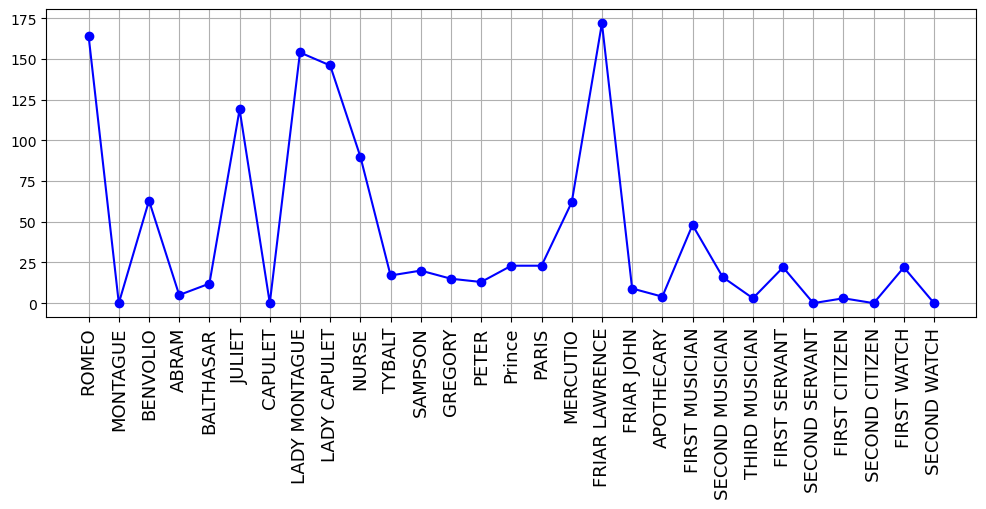

In [283]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from gensim.parsing.preprocessing import remove_stopwords
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize, sent_tokenize

with open(r'/Users/usraaziz/Desktop/Romeo_and_Juliet.txt', 'r') as file:
    romeo_and_juliet_raw = file.read()

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

extra_words = ['A', 'All', 'and', 'And', 'But', 'come', 'could', 'day', 'even', 'He',
               'he', 'it', 'It', 'If', 'I', 'In', 'like', 'man', 'made', 'men', 'must',
               'Man', 'One', 'one', 'She', 'see', 'she', 'said', 'say', 'Say', 'sort',
               'still', 'the', 'That', 'To', 'They', 'This', 'The', 'Then', 'There',
               'would', 'two', 'What', 'You', '-', '_', '—', '***', 'Gutenberg', 'project gutenberg™',
               'my', 'thou', 'which', 'come', 'o', 'new', 'ebooks', 'website', 'includes', 'information',
               'make', 'donations']
extra_words[1:5]

romeo_and_juliet_t = word_tokenize(romeo_and_juliet_raw)

# Combine multi-word character names into a single token
combined_character_names = ['LADY MONTAGUE', 'LADY CAPULET', 'FRIAR LAWRENCE', 'FRIAR JOHN', 'FIRST MUSICIAN',
                             'SECOND MUSICIAN', 'THIRD MUSICIAN', 'FIRST SERVANT', 'SECOND SERVANT', 'FIRST CITIZEN',
                             'SECOND CITIZEN', 'FIRST WATCH', 'SECOND WATCH'] 

for name in combined_character_names:
    romeo_and_juliet_t = [name if token.lower() in name.lower().split() else token for token in romeo_and_juliet_t]

filtered_romeo_and_juliet = [w for w in romeo_and_juliet_t if not w in stop_words]
filtered_romeo_and_juliet2 = [w for w in filtered_romeo_and_juliet if not w in extra_words]

punctuations = '''!()-,[]{};:’“”'"\,,<>./?@#$%^&*_~'''
filtered_romeo_and_juliet3 = [w for w in filtered_romeo_and_juliet2 if not w in punctuations]

text_start = filtered_romeo_and_juliet3.index('_Exit._')
filtered_romeo_and_juliet4 = filtered_romeo_and_juliet3[text_start:]


romeo_and_juliet_text4 = ' '.join(filtered_romeo_and_juliet4)
romeo_and_juliet_sentences4 = sent_tokenize(romeo_and_juliet_text4)

# create a new variable called filtered_romeo_and_juliet5 to remove the end of the ebook
filtered_romeo_and_juliet5 = filtered_romeo_and_juliet4[:filtered_romeo_and_juliet4.index('previous')]

numTokens = len(filtered_romeo_and_juliet5)

character_list = ['ROMEO', 'MONTAGUE', 'BENVOLIO', 'ABRAM', 'BALTHASAR', 'JULIET', 'CAPULET', 'LADY MONTAGUE',
                   'LADY CAPULET', 'NURSE', 'TYBALT', 'SAMPSON', 'GREGORY', 'PETER', 'Prince', 'PARIS', 
                  'MERCUTIO', 'FRIAR LAWRENCE', 'FRIAR JOHN', 'APOTHECARY', 'FIRST MUSICIAN',
                             'SECOND MUSICIAN', 'THIRD MUSICIAN', 'FIRST SERVANT', 'SECOND SERVANT', 
                  'FIRST CITIZEN', 'SECOND CITIZEN', 'FIRST WATCH', 'SECOND WATCH']
numCharacters = len(character_list)

character_map = {}
for i in range(numCharacters):
    character_map[i] = character_list[i]

k = 0
numOccurrences = pd.Series(range(numCharacters))
for character in character_list:
    numOccurrences[k] = filtered_romeo_and_juliet5.count(character)
    k = k + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(111)
plt.plot(numOccurrences, 'b-o')
plt.xticks(np.arange(0, numCharacters), character_list)
plt.grid()
ax.tick_params(axis='x', rotation=90, labelsize=13)
plt.show()

Fig. 3. 

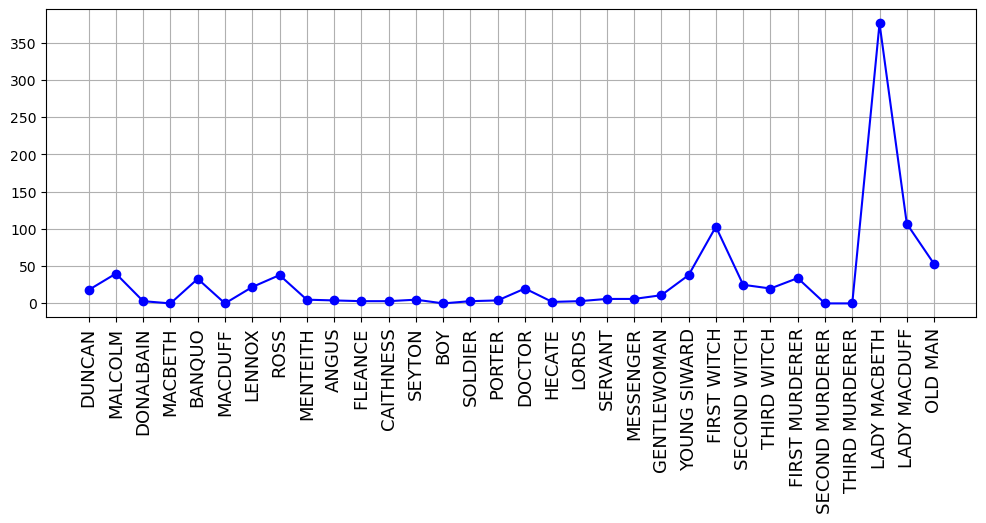

In [284]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from gensim.parsing.preprocessing import remove_stopwords
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize, sent_tokenize

with open(r'/Users/usraaziz/Desktop/Macbeth.txt', 'r', encoding='utf-8') as file:
    macbeth_raw = file.read()

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

extra_words = ['A', 'All', 'and', 'And', 'But', 'come', 'could', 'day', 'even', 'He',
               'he', 'it', 'It', 'If', 'I', 'In', 'like', 'man', 'made', 'men', 'must',
               'Man', 'One', 'one', 'She', 'see', 'she', 'said', 'say', 'Say', 'sort',
               'still', 'the', 'That', 'To', 'They', 'This', 'The', 'Then', 'There',
               'would', 'two', 'What', 'You', '-', '_', '—', '***', 'Gutenberg', 'project gutenberg™',
               'my', 'thou', 'which', 'come', 'o', 'new', 'ebooks', 'website', 'includes', 'information',
               'make', 'donations']
extra_words[1:5]

macbeth_t = word_tokenize(macbeth_raw)

# Combine multi-word character names into a single token
combined_character_names2 = ['YOUNG SIWARD', 'FIRST WITCH', 'SECOND WITCH', 'THIRD WITCH', 'FIRST MURDERER',
                            'SECOND MURDERER', 'THIRD MURDERER', 'LADY MACBETH', 'LADY MACDUFF',
                            'OLD MAN']

for name in combined_character_names2:
    macbeth_t = [name if token.lower() in name.lower().split() else token for token in macbeth_t]

# remove stop words from Macbeth
filtered_macbeth = [w for w in macbeth_t if not w in stop_words]
filtered_macbeth2 = [w for w in filtered_macbeth if not w in extra_words]

#remove punctuation from list
punctuations = '''!()-,[]{};:’“”'"\,,<>./?@#$%^&*_~'''
filtered_macbeth3 = [w for w in filtered_macbeth2 if not w in punctuations]

text_start2=filtered_macbeth3.index('Apparitions')
filtered_macbeth4 =filtered_macbeth3[text_start2:]

# create a new variable called filtered_macbeth5 to remove the end of the ebook
filtered_macbeth5 = filtered_macbeth4[:filtered_macbeth4.index('previous')]

numTokens2 = len(filtered_macbeth5)

character_list2 = ['DUNCAN', 'MALCOLM', 'DONALBAIN','MACBETH', 'BANQUO', 'MACDUFF', 'LENNOX', 'ROSS', 
                  'MENTEITH','ANGUS', 'FLEANCE', 'CAITHNESS', 'SEYTON', 'BOY', 
                  'SOLDIER', 'PORTER', 'DOCTOR', 'HECATE', 
                  'LORDS', 'SERVANT', 'MESSENGER', 'GENTLEWOMAN','YOUNG SIWARD', 'FIRST WITCH', 'SECOND WITCH',
                  'THIRD WITCH', 'FIRST MURDERER','SECOND MURDERER', 'THIRD MURDERER', 'LADY MACBETH', 
                   'LADY MACDUFF','OLD MAN']
numCharacters2 = len(character_list2)

character_map2 = {}
for i in range(numCharacters2):
    character_map2[i] = character_list2[i]

k = 0
numOccurrences2 = pd.Series(range(numCharacters2))
for character in character_list2:
    numOccurrences2[k] = filtered_macbeth5.count(character)
    k = k + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(111)
plt.plot(numOccurrences2, 'b-o')
plt.xticks(np.arange(0, numCharacters2), character_list2)
plt.grid()
ax.tick_params(axis='x', rotation=90, labelsize=13)
plt.show()

Fig 4. 

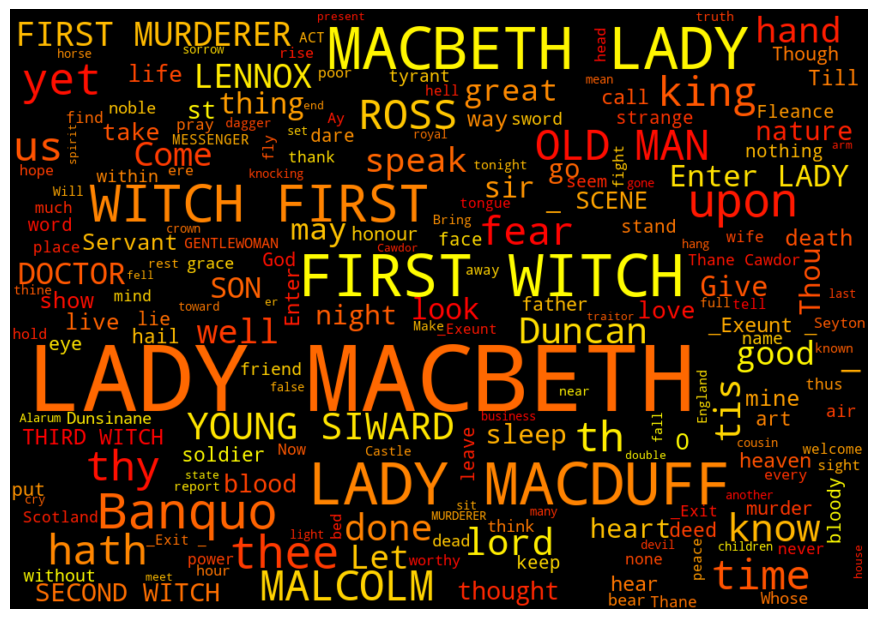

In [285]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib

# Assuming filtered_macbeth5 is your text data
text_data_macbeth = ' '.join(filtered_macbeth5)

# Remove apostrophes from the text
text_data_macbeth = text_data_macbeth.replace("'", "")

# Create WordCloud
wordcloud_macbeth = WordCloud(width=1000, height=700,
                              background_color='black', colormap=matplotlib.cm.autumn,
                              min_font_size=10).generate(text_data_macbeth)

# Plot the WordCloud image
plt.figure(figsize=(11, 6), facecolor=None)
plt.imshow(wordcloud_macbeth, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


Fig 5. 

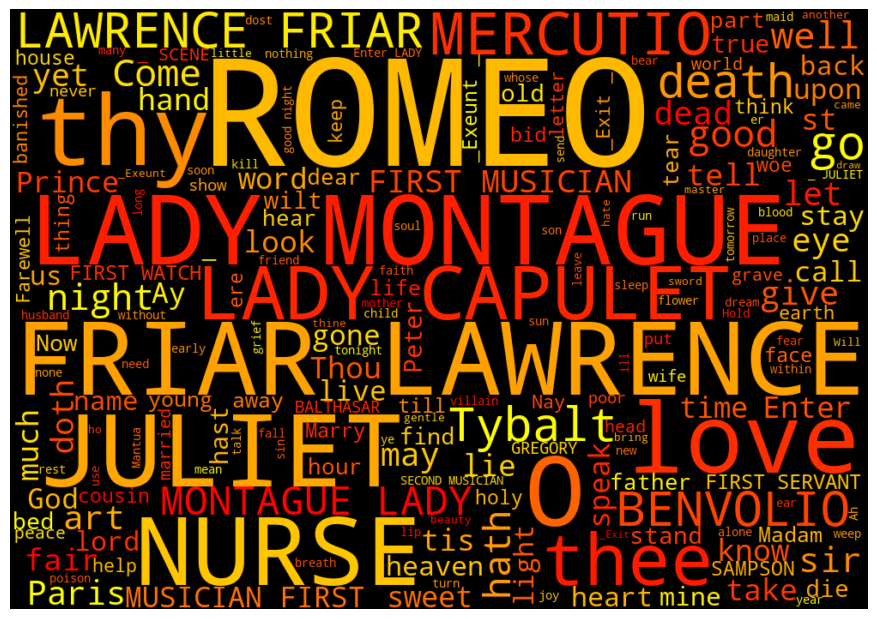

In [286]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib

# Assuming filtered_macbeth5 is your text data
text_data2 = ' '.join(filtered_romeo_and_juliet5)

# Remove apostrophes from the text
text_data3 = text_data.replace("'", "")

# Create WordCloud
wordcloud2 = WordCloud(width=1000, height=700,
                      background_color='black', colormap=matplotlib.cm.autumn,
                      min_font_size=10).generate(text_data3)

# Plot the WordCloud image
plt.figure(figsize=(11, 6), facecolor=None)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


Fig 6.

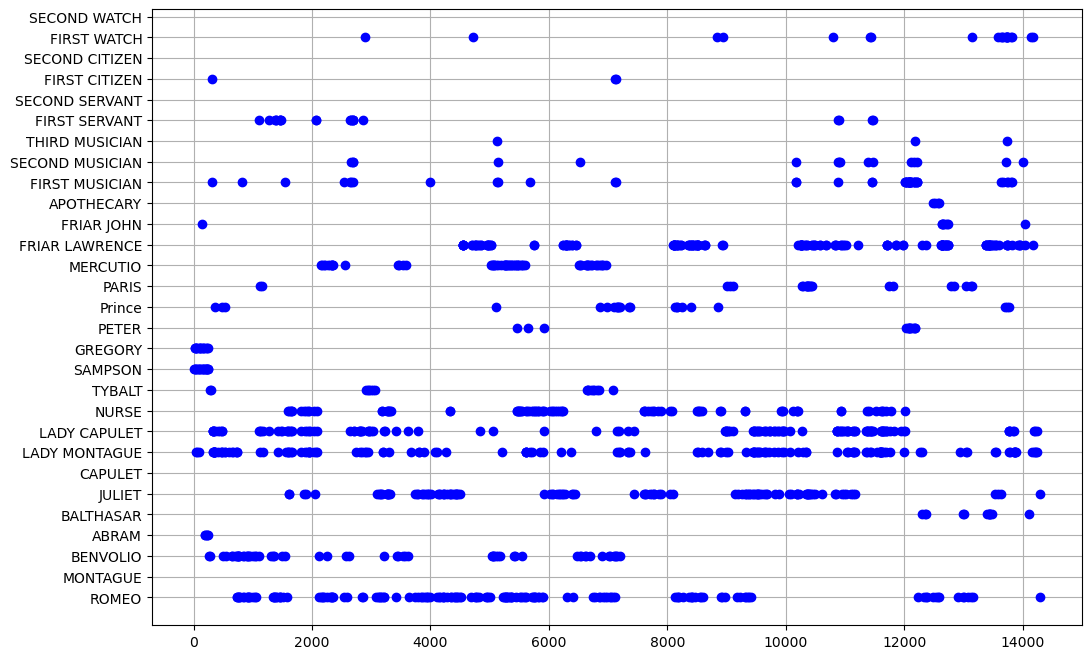

In [287]:
positions_characters = [] 
for i in range(len(numOccurrences)):
    a = np.zeros(numOccurrences[i])  
    positions_characters.append(a)
    
for j in range(numCharacters):
    positions_current   =[]
    for i in range(numTokens):
        if filtered_romeo_and_juliet5[i]==character_list[j]:
            #print(i)
            positions_current.append(i)
    positions_characters[j][:]=positions_current

positions_characters[0]

fig   = plt.figure(figsize = (12, 8))
ax    = fig.add_subplot(111)
for j in range(0,numCharacters):
    plt.plot( positions_characters[j],j*np.ones(numOccurrences[j]),'bo')
    
plt.yticks(np.arange(0,numCharacters),character_list)
plt.grid()

Fig 7.

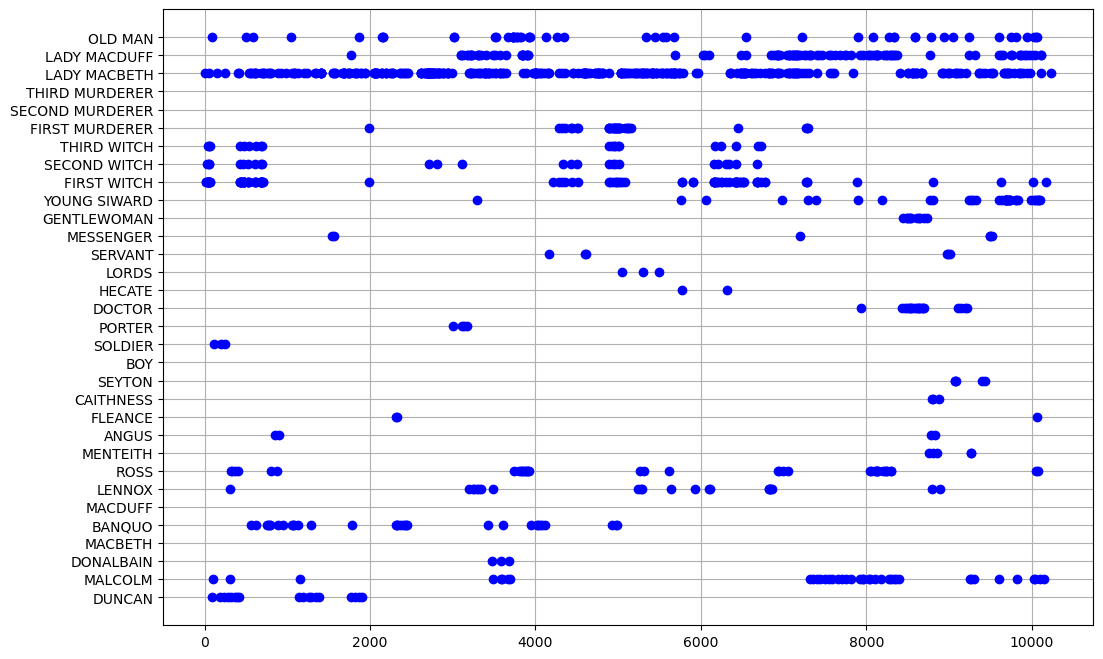

In [288]:
positions_characters2 = [] 
for i in range(len(numOccurrences2)):
    a = np.zeros(numOccurrences2[i])  
    positions_characters2.append(a)
    
for j in range(numCharacters2):
    positions_current2   =[]
    for i in range(numTokens2):
        if filtered_macbeth5[i]==character_list2[j]:
            #print(i)
            positions_current2.append(i)
    positions_characters2[j][:]=positions_current2

positions_characters2[0]

fig   = plt.figure(figsize = (12, 8))
ax    = fig.add_subplot(111)
for j in range(0,numCharacters2):
    plt.plot( positions_characters2[j],j*np.ones(numOccurrences2[j]),'bo')
    
plt.yticks(np.arange(0,numCharacters2),character_list2)
plt.grid()

Fig 8.

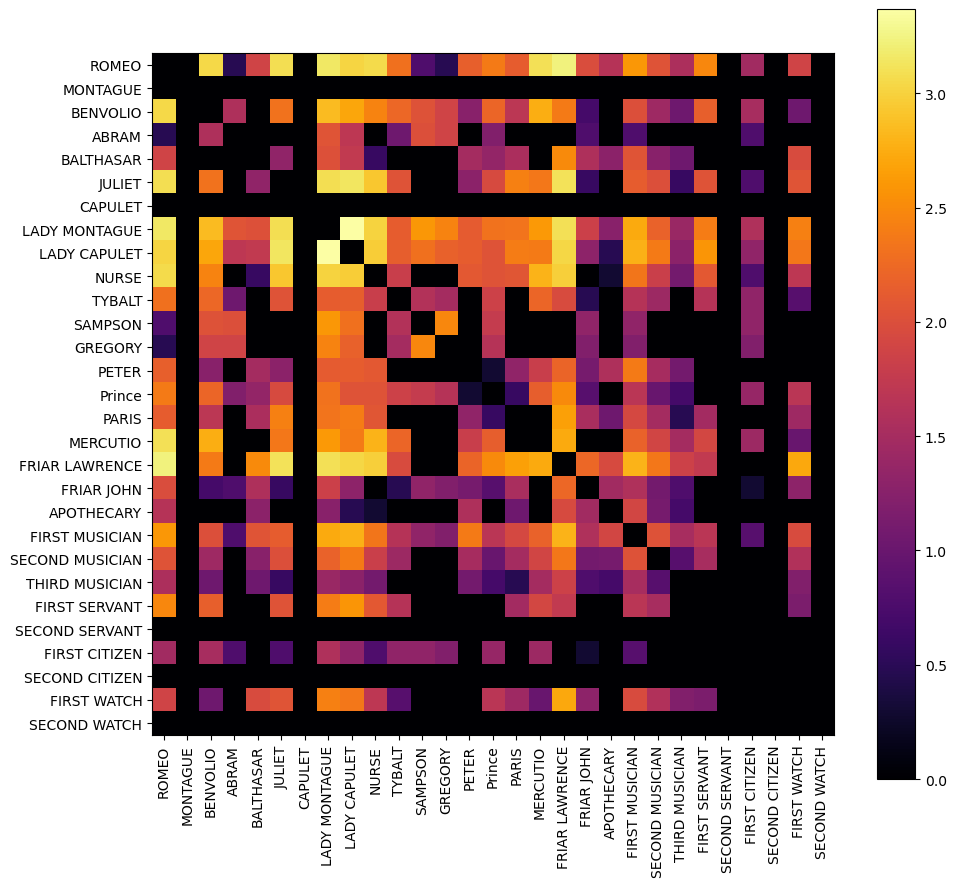

In [289]:
interactions_characters = np.zeros((numCharacters,numCharacters))
for i in range(numCharacters-1):
    for j in range(i+1,numCharacters):
        # A pair of characters (i,j) has been selected, 
        # now iterate over their locations and find the distances
        #print(i,j)
        for loc_i in range(numOccurrences[i]):
            for loc_j in range(numOccurrences[j]):
                # find distance
                dist = abs(positions_characters[i][loc_i]-positions_characters[j][loc_j])
                #if distance is small, then record interaction
                if (dist<500):
                    interactions_characters[i,j]=interactions_characters[i,j]+1
                    interactions_characters[j,i]=interactions_characters[j,i]+1
                #print(i,j, positions_characters[i][loc_i],positions_characters[j][loc_j])
                #print(i,j, loc_i,loc_j,dist)

fig3 = plt.figure(figsize = (11, 10)) 
ax3    = fig3.add_subplot(111)
plt.imshow(np.log10(1+interactions_characters),cmap=matplotlib.cm.inferno)
plt.colorbar()
plt.yticks(np.arange(0,numCharacters),character_list)
plt.xticks(np.arange(0,numCharacters),character_list)
ax3.tick_params(axis='x', rotation=90, labelsize=10)

Fig 9.

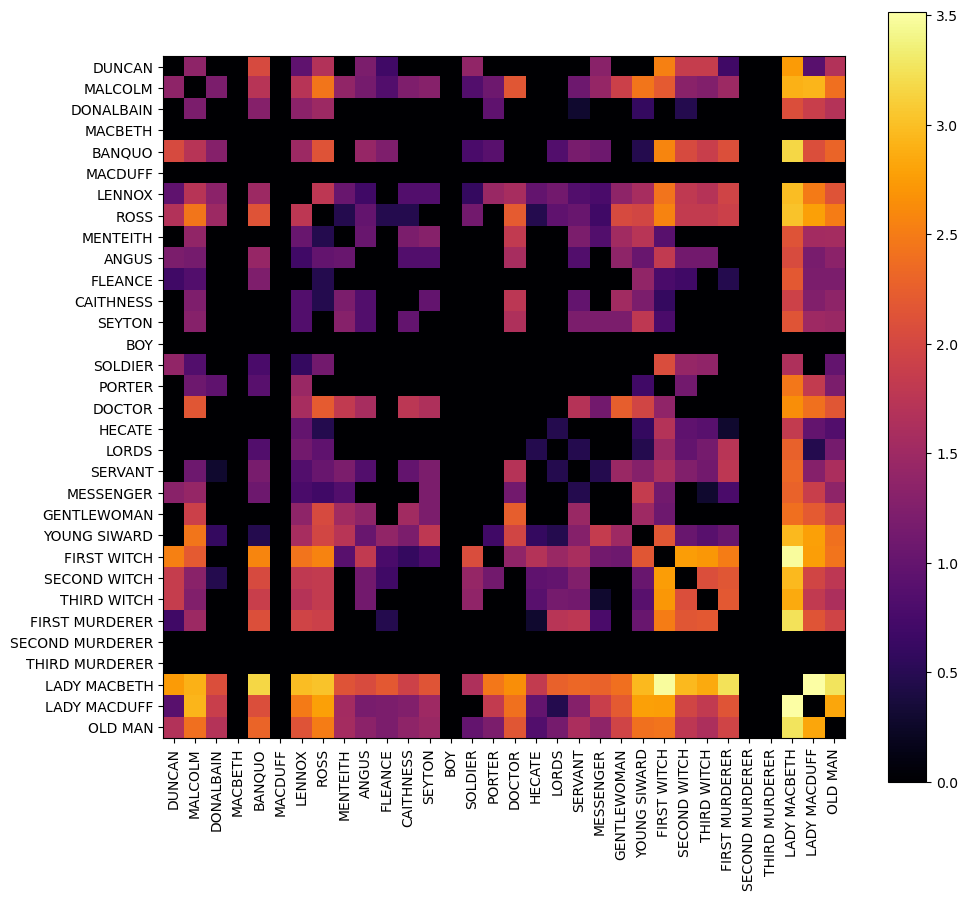

In [290]:
interactions_characters2 = np.zeros((numCharacters2,numCharacters2))
for i in range(numCharacters2-1):
    for j in range(i+1,numCharacters2):
        # A pair of characters (i,j) has been selected, 
        # now iterate over their locations and find the distances
        #print(i,j)
        for loc_i in range(numOccurrences2[i]):
            for loc_j in range(numOccurrences2[j]):
                # find distance
                dist = abs(positions_characters2[i][loc_i]-positions_characters2[j][loc_j])
                #if distance is small, then record interaction
                if (dist<500):
                    interactions_characters2[i,j]=interactions_characters2[i,j]+1
                    interactions_characters2[j,i]=interactions_characters2[j,i]+1
                #print(i,j, positions_characters[i][loc_i],positions_characters[j][loc_j])
                #print(i,j, loc_i,loc_j,dist)

fig3 = plt.figure(figsize = (11, 10)) 
ax3    = fig3.add_subplot(111)
plt.imshow(np.log10(1+interactions_characters2),cmap=matplotlib.cm.inferno)
plt.colorbar()
plt.yticks(np.arange(0,numCharacters2),character_list2)
plt.xticks(np.arange(0,numCharacters2),character_list2)
ax3.tick_params(axis='x', rotation=90, labelsize=10)

Fig 10.

Counter({   'ROMEO': 625,
            'JULIET': 415,
            'LADY CAPULET': 352,
            'NURSE': 288,
            'PARIS': 155,
            'MERCUTIO': 144,
            'TYBALT': 126,
            'PETER': 84,
            'LADY MONTAGUE': 82,
            'BENVOLIO': 75,
            'BALTHASAR': 35,
            'APOTHECARY': 23,
            'SAMPSON': 14,
            'GREGORY': 12,
            'ABRAM': 5})


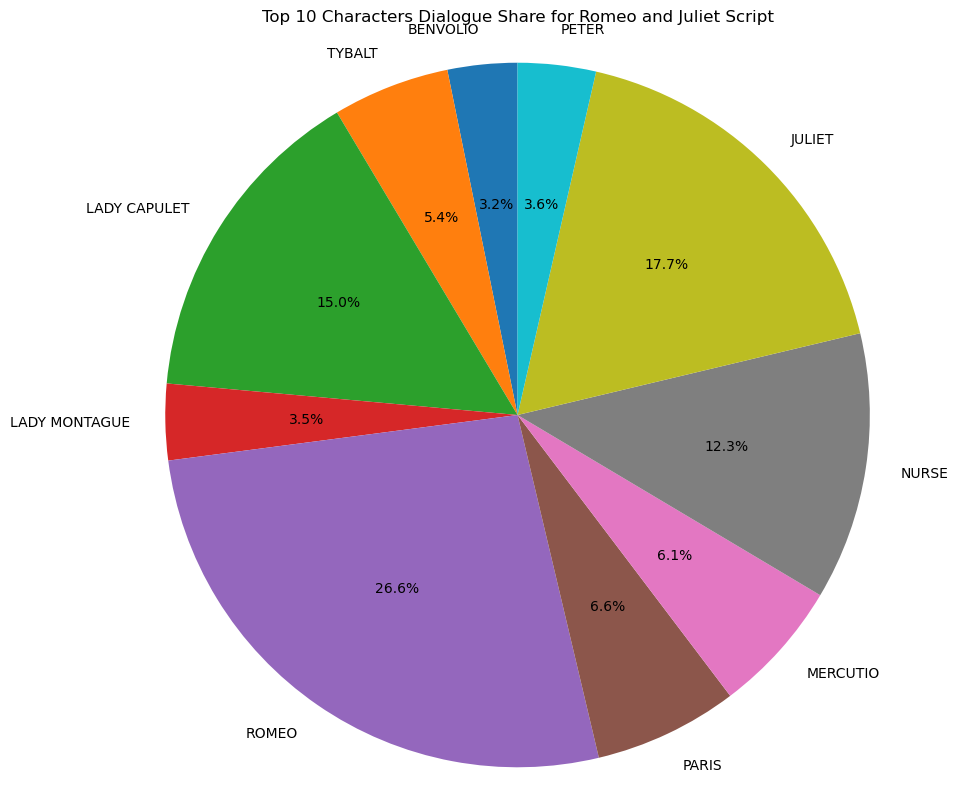

Top 10 characters contribute, on average, 50.8% of the total script length.


In [291]:
# Pie chart of top characters for Romeo and Juliet
import matplotlib.pyplot as plt
from nltk import pos_tag, word_tokenize
from nltk.tokenize import word_tokenize
from collections import Counter
import pprint
import re

def read_text(file_path):
    with open(file_path, 'r') as f:
        script = f.read()
    return script

def text_tokenize(script):
    tokenize = word_tokenize(script)
    return tokenize

def tagging(tokenize):
    tagged_text = pos_tag(tokenize)
    return tagged_text

def find_dialogue(character_list, tagged_text):
    dialogue = []
    current_character = None
    
    for word, pos in tagged_text:
        if word.upper() in character_list:
            current_character = word.upper()
        elif current_character is not None and pos == 'NNP':
            if current_character in character_list:
                dialogue.append(current_character)
    
    return dialogue

def summarize_dialogue(dialogue, top_num):
    counts = dict(Counter(dialogue).most_common(top_num))
    return counts

def create_pie_chart(top_characters, title):
    labels = list(top_characters.keys())
    values = list(top_characters.values())

    plt.figure(figsize=(10, 10))
    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title(title)
    plt.axis('equal')

    plt.show()

# Define the list of characters
character_list = ['ROMEO', 'MONTAGUE', 'BENVOLIO', 'ABRAM', 'BALTHASAR', 'JULIET', 'CAPULET', 'LADY MONTAGUE',
                   'LADY CAPULET', 'NURSE', 'TYBALT', 'SAMPSON', 'GREGORY', 'PETER', 'Prince', 'PARIS', 
                  'MERCUTIO', 'FRIAR LAWRENCE', 'FRIAR JOHN', 'APOTHECARY', 'FIRST MUSICIAN',
                             'SECOND MUSICIAN', 'THIRD MUSICIAN', 'FIRST SERVANT', 'SECOND SERVANT', 'FIRST CITIZEN',
                             'SECOND CITIZEN', 'FIRST WATCH', 'SECOND WATCH']

# Specify the file path
file_path = '/Users/usraaziz/Desktop/filtered_romeo_and_juliet5.txt'

# Call the functions
script = read_text(file_path)
tokenize = text_tokenize(script)
tagged_text = tagging(tokenize)
dialogue = find_dialogue(character_list, tagged_text)
top_characters = summarize_dialogue(dialogue, 10)

# Combine multi-word character names into a single token
combined_character_names = ['LADY MONTAGUE', 'LADY CAPULET', 'FRIAR LAWRENCE', 'FRIAR JOHN', 'FIRST MUSICIAN',
                             'SECOND MUSICIAN', 'THIRD MUSICIAN', 'FIRST SERVANT', 'SECOND SERVANT', 'FIRST CITIZEN',
                             'SECOND CITIZEN', 'FIRST WATCH', 'SECOND WATCH']  

for name in combined_character_names:
    dialogue = [name if token.lower() in name.lower().split() else token for token in dialogue]

# Print the top characters and their dialogue counts
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(Counter(dialogue))

# Filter to include only the top N characters in the pie chart
top_n = 10
filtered_dialogue = [char for char in dialogue if char in dict(Counter(dialogue).most_common(top_n))]

# Create a pie chart for the top characters
create_pie_chart(Counter(filtered_dialogue), f'Top {top_n} Characters Dialogue Share for Romeo and Juliet Script')

import re

# Read the text file
filename = "/Users/usraaziz/Desktop/filtered_romeo_and_juliet5.txt"
with open(filename, 'r', encoding='utf-8') as file:
    script_text = file.read()

# Tokenize the text into characters 
characters = re.findall(r'\b\w+\b', script_text)

# Calculate the length of each character's contribution
character_lengths = {character: len(re.findall(character, script_text)) for character in set(characters)}

# Sort character lengths in descending order
sorted_character_lengths = sorted(character_lengths.items(), key=lambda x: x[1], reverse=True)

# Extract the top 15 character lengths
top_10_lengths = dict(sorted_character_lengths[:10])

# Calculate the total script length and sum of top 10 character lengths
total_script_length = sum(character_lengths.values())
sum_top_10_lengths = sum(top_10_lengths.values())

# Calculate the percentage
percentage_contributed = (sum_top_10_lengths / total_script_length) * 100

# Print the result
print(f'Top 10 characters contribute, on average, {percentage_contributed:.1f}% of the total script length.')

Fig. 11.

{   'BANQUO': 158,
    'DOCTOR': 45,
    'DUNCAN': 101,
    'FLEANCE': 41,
    'LADY MACBETH': 863,
    'LADY MACDUFF': 251,
    'LENNOX': 113,
    'MALCOLM': 120,
    'PORTER': 26,
    'ROSS': 115}


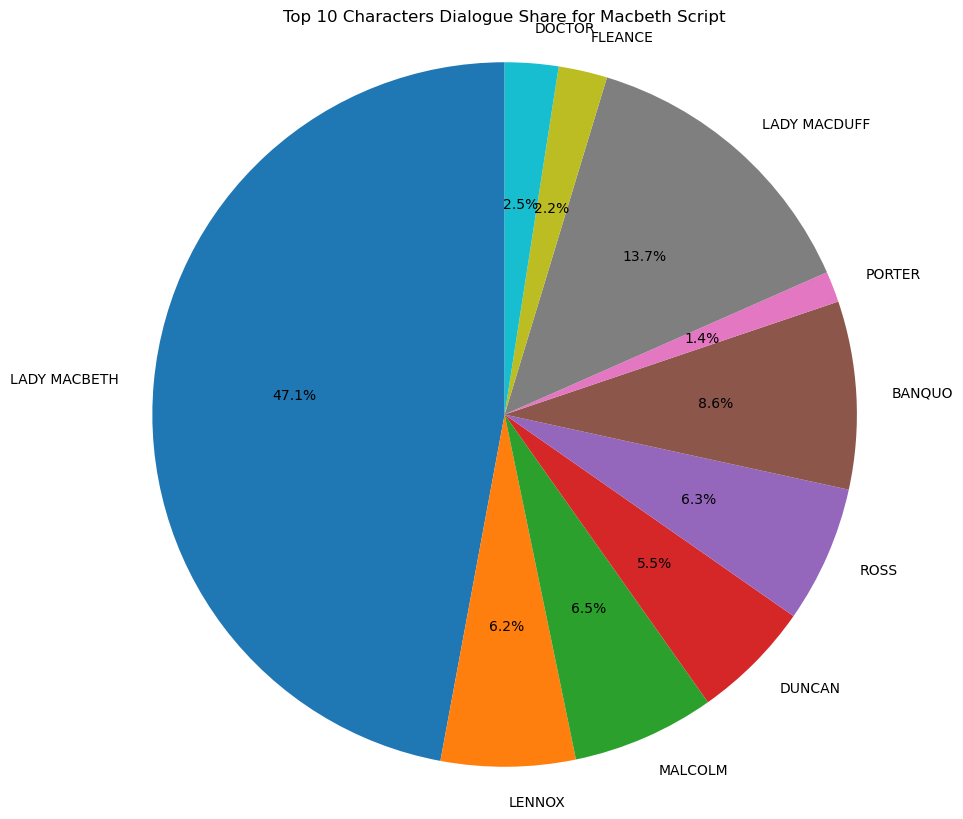

Top 10 characters contribute, on average, 57.2% of the total script length.


In [300]:
# Pie chart of top 10 characters for Macbeth
import matplotlib.pyplot as plt
from nltk import pos_tag, word_tokenize
from nltk.tokenize import word_tokenize
from collections import Counter
import pprint
import re

def read_text(file_path2):
    with open(file_path2, 'r') as f:
        script2 = f.read()
    return script2

def text_tokenize(script2):
    tokenize2 = word_tokenize(script2)
    return tokenize2

def tagging(tokenize2):
    tagged_text2 = pos_tag(tokenize2)
    return tagged_text2

def find_dialogue(character_list2, tagged_text2):
    dialogue2 = []
    current_character2 = None
    
    for word, pos in tagged_text2:
        if word.upper() in character_list2:
            current_character2 = word.upper()
        elif current_character2 is not None and pos == 'NNP':
            # Ensuring the word is not a character but a part of their dialogue
            if current_character2 in character_list2:
                dialogue2.append(current_character2)
    
    return dialogue2

def summarize_dialogue(dialogue2, top_num2):
    counts2 = dict(Counter(dialogue2).most_common(top_num2))
    return counts2

def create_pie_chart(top_characters2, title2):
    labels2 = list(top_characters2.keys())
    values2 = list(top_characters2.values())

    plt.figure(figsize=(10, 10))
    plt.pie(values2, labels=labels2, autopct='%1.1f%%', startangle=90)
    plt.title(title2)
    plt.axis('equal')

    plt.show()

# Define the list of characters in Macbeth
character_list2 = ['DUNCAN', 'MALCOLM', 'DONALBAIN','MACBETH', 'BANQUO', 'MACDUFF', 'LENNOX', 'ROSS', 
                  'MENTEITH','ANGUS', 'FLEANCE', 'CAITHNESS', 'SEYTON', 'BOY', 
                  'SOLDIER', 'PORTER', 'DOCTOR', 'HECATE', 
                  'LORDS', 'SERVANT', 'MESSENGER', 'GENTLEWOMAN','YOUNG SIWARD', 'FIRST WITCH', 'SECOND WITCH',
                  'THIRD WITCH', 'FIRST MURDERER','SECOND MURDERER', 'THIRD MURDERER', 'LADY MACBETH', 
                   'LADY MACDUFF','OLD MAN']

# Specify the file path
file_path2 = '/Users/usraaziz/Desktop/filtered_macbeth5.txt'

# Call the functions
script2 = read_text(file_path2)
tokenize2 = text_tokenize(script2)
tagged_text2 = tagging(tokenize2)
dialogue2 = find_dialogue(character_list2, tagged_text2)

# Combine multi-word character names into a single token
combined_character_names2 = ['LADY MACBETH', 'LADY MACDUFF', 'OLD MAN','YOUNG SIWARD', 'FIRST WITCH', 'SECOND WITCH',
                  'THIRD WITCH', 'FIRST MURDERER','SECOND MURDERER', 'THIRD MURDERER']  
for name2 in combined_character_names2:
    dialogue2 = [name2 if token.lower() in name2.lower().split() else token for token in dialogue2]

top_characters2 = summarize_dialogue(dialogue2, 10)

# Print the top characters and their dialogue counts
pp2 = pprint.PrettyPrinter(indent=4)
pp2.pprint(top_characters2)

# Filter to include only the top N characters in the pie chart
top_n2 = 10
filtered_dialogue2 = [char for char in dialogue2 if char in dict(Counter(dialogue2).most_common(top_n2))]

# Create a pie chart for the top characters
create_pie_chart(Counter(filtered_dialogue2), f'Top {top_n2} Characters Dialogue Share for Macbeth Script')

# Read the text file
filename2 = "/Users/usraaziz/Desktop/filtered_macbeth5.txt"
with open(filename2, 'r', encoding='utf-8') as file:
    script_text2 = file.read()

# Tokenize the text into characters 
characters2 = re.findall(r'\b\w+\b', script_text2)

# Calculate the length of each character's contribution
character_lengths2 = {character: len(re.findall(character, script_text2)) for character in set(characters)}

# Sort character lengths in descending order
sorted_character_lengths2 = sorted(character_lengths2.items(), key=lambda x: x[1], reverse=True)

# Extract the top 15 character lengths
top_10_lengths2 = dict(sorted_character_lengths2[:10])

# Calculate the total script length and sum of top 10 character lengths
total_script_length2 = sum(character_lengths2.values())
sum_top_10_lengths2 = sum(top_10_lengths2.values())

# Calculate the percentage
percentage_contributed2 = (sum_top_10_lengths2 / total_script_length2) * 100

# Print the result
print(f'Top 10 characters contribute, on average, {percentage_contributed2:.1f}% of the total script length.')


Fig. 12

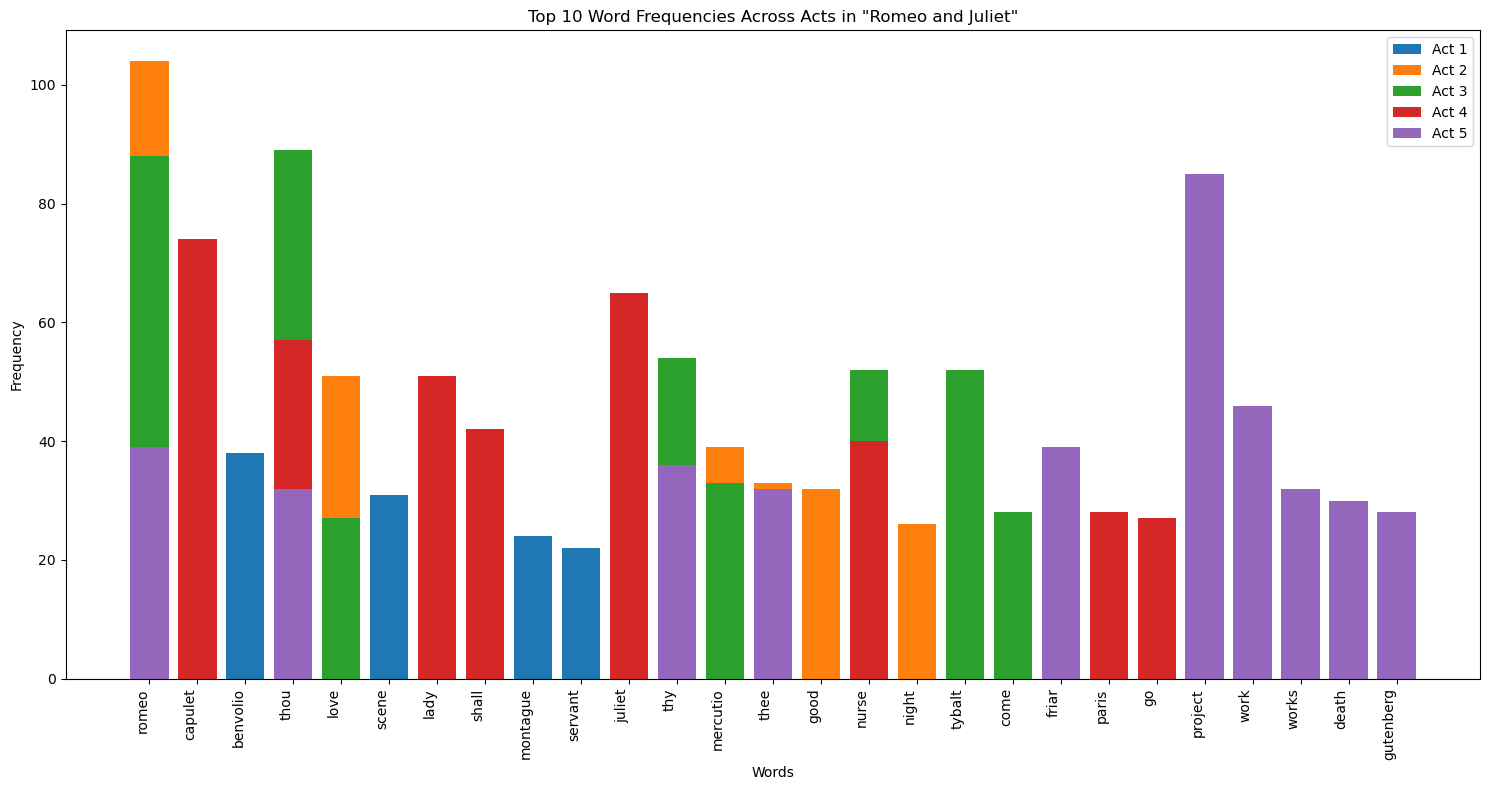

In [293]:
import nltk
import matplotlib.pyplot as plt
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

romeo_and_juliet_sentences = sent_tokenize(romeo_and_juliet_raw)

# function to split the play into acts
def split_into_acts(sentences, num_acts):
    act_size, remainder = divmod(len(sentences), num_acts)
    acts = [sentences[i:i + act_size] for i in range(0, len(sentences) - remainder, act_size)]


    acts[-1] += sentences[-remainder:]

    return acts

# Split the play into 5 acts
num_acts = 5
acts = split_into_acts(romeo_and_juliet_sentences, num_acts)

# Initialize a list to store word frequencies for each act
act_word_frequencies = []

# Tokenize the words and calculate word frequencies for each act
for act_index, act_sentences in enumerate(acts):
    act_words = [word.lower() for sentence in act_sentences for word in word_tokenize(sentence)]
    filtered_words = [word for word in act_words if word.isalpha() and word not in stopwords.words('english')]
    freq_dist = FreqDist(filtered_words)
    act_word_frequencies.append(freq_dist)

# Plot word frequencies for each act with rotated x-axis labels
plt.figure(figsize=(15, 8))
for act_index, freq_dist in enumerate(act_word_frequencies):
    top_words = freq_dist.most_common(10)  # Display the top 10 words for each act
    words, counts = zip(*top_words)
    plt.bar(words, counts, label=f'Act {act_index + 1}')

plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Word Frequencies Across Acts in "Romeo and Juliet"')
plt.legend()
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


Fig. 13.

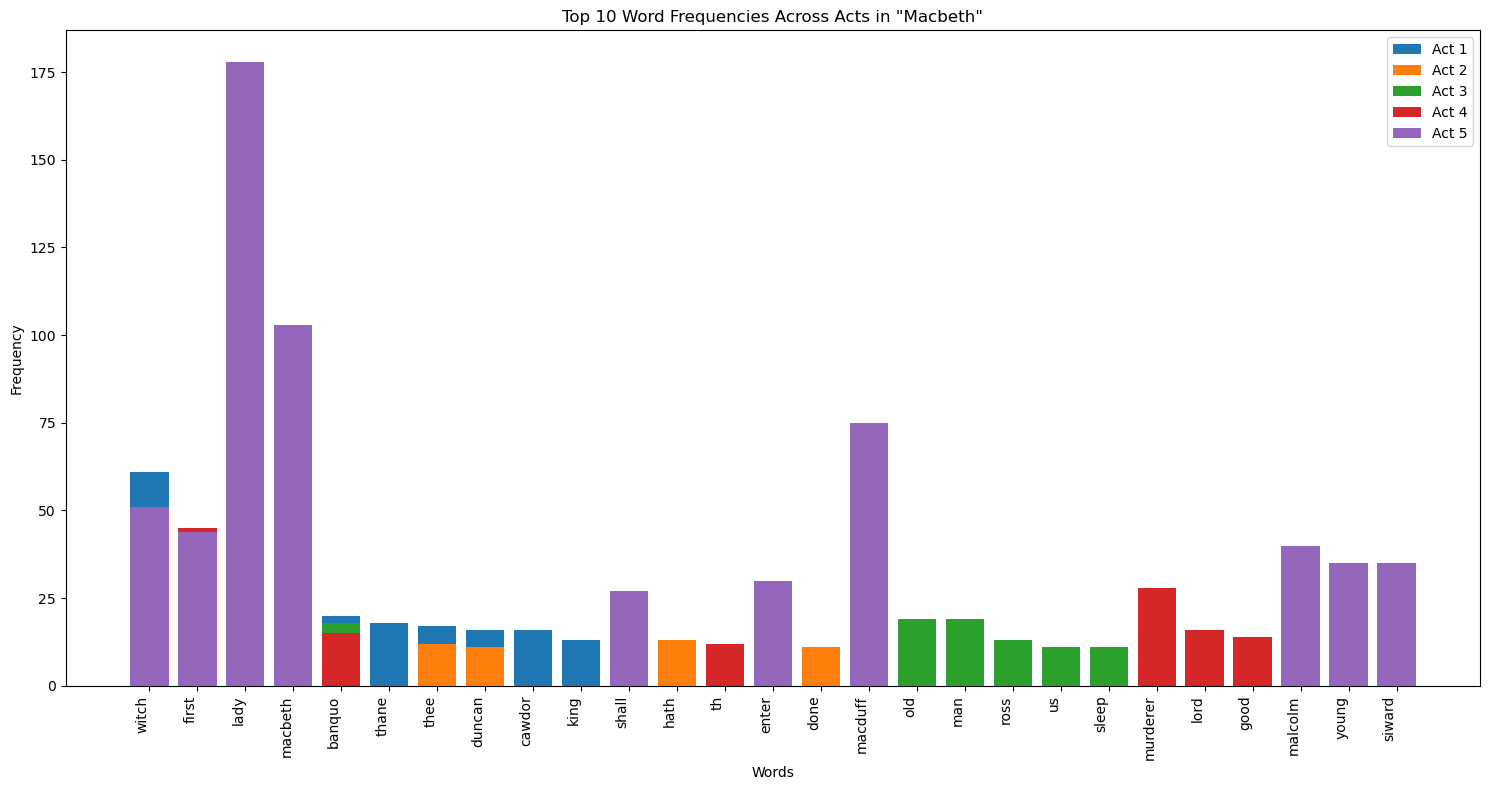

In [294]:
import nltk
import matplotlib.pyplot as plt
from nltk import FreqDist
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

macbeth_sentences = filtered_macbeth5

# Join the list of sentences into a single string
macbeth_text = ' '.join(macbeth_sentences)

# Tokenize the sentences
macbeth_sentences = sent_tokenize(macbeth_text)

# Modified function to split the play into acts
def split_into_acts(sentences, num_acts):
    act_size, remainder = divmod(len(sentences), num_acts)
    acts = [sentences[i:i + act_size] for i in range(0, len(sentences) - remainder, act_size)]

   
    acts[-1] += sentences[-remainder:]

    return acts

# Split the play into 5 acts 
num_acts = 5
acts = split_into_acts(macbeth_sentences, num_acts)

# Initialize a list to store word frequencies for each act
act_word_frequencies = []

# Tokenize the words and calculate word frequencies for each act
for act_index, act_sentences in enumerate(acts):
    act_words = [word.lower() for sentence in act_sentences for word in word_tokenize(sentence)]
    filtered_words = [word for word in act_words if word.isalpha() and word not in stopwords.words('english')]
    freq_dist = FreqDist(filtered_words)
    act_word_frequencies.append(freq_dist)

# Plot word frequencies for each act with rotated x-axis labels
plt.figure(figsize=(15, 8))
for act_index, freq_dist in enumerate(act_word_frequencies):
    top_words = freq_dist.most_common(10)  # Display the top 10 words for each act
    words, counts = zip(*top_words)
    plt.bar(words, counts, label=f'Act {act_index + 1}')

plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Word Frequencies Across Acts in "Macbeth"')
plt.legend()
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()  
plt.show()


Fig. 14.

In [295]:
import plotly.graph_objects as go

dialogue_lines = [line.strip() for line in filtered_romeo_and_juliet5 if line.strip() and line.isupper()]

# Analyze sentiment for each dialogue line
sentiment_scores = []
for line_number, line in enumerate(dialogue_lines, start=1):
    analysis = TextBlob(line)
    sentiment_scores.append(analysis.sentiment.polarity)

# Apply a moving average for smoothing
window_size = 8
smoothed_sentiment_scores = [sum(sentiment_scores[i:i+window_size]) / window_size for i in range(len(sentiment_scores) - window_size + 1)]

# Convert range to a list
x_values = list(range(1, len(smoothed_sentiment_scores) + 1))

# Create a figure using Plotly
fig = go.Figure()
fig.add_trace(go.Scatter(x=x_values, y=smoothed_sentiment_scores, mode='lines+markers'))

# Update layout
fig.update_layout(title='Smoothed Sentiment Analysis of Romeo and Juliet by Dialogue Lines',
                  xaxis=dict(title='Dialogue Line Number'),
                  yaxis=dict(title='Smoothed Sentiment Score'))
fig.show()

Fig. 15.

In [296]:
import plotly.graph_objects as go

dialogue_lines2 = [line.strip() for line in filtered_macbeth5 if line.strip() and line.isupper()]

# Analyze sentiment for each dialogue line
sentiment_scores2 = []
for line_number, line in enumerate(dialogue_lines2, start=1):
    analysis = TextBlob(line)
    sentiment_scores2.append(analysis.sentiment.polarity)

# Apply a moving average for smoothing
window_size2 = 10
smoothed_sentiment_scores2 = [sum(sentiment_scores2[i:i+window_size]) / window_size for i in range(len(sentiment_scores2) - window_size + 1)]

# Convert range to a list
x_values2 = list(range(1, len(smoothed_sentiment_scores2) + 1))

# Create a figure using Plotly
fig = go.Figure()

# Add scatter plot
fig.add_trace(go.Scatter(x=x_values2, y=smoothed_sentiment_scores2, mode='lines+markers', name='Smoothed Sentiment'))

# Update layout
fig.update_layout(title='Smoothed Sentiment Analysis of Macbeth by Dialogue Lines',
                  xaxis=dict(title='Dialogue Line Number'),
                  yaxis=dict(title='Smoothed Sentiment Score'),
                  showlegend=True)
fig.show()


Fig. 16.